In [1]:
!pip install kaggle

In [2]:
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 108MB/s]


In [3]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.head(),end='\n\n\n')
print(test_data.head(),end='\n\n\n')

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  




In [6]:
train_data_copy = train_data

In [7]:
train_data.info()
print('-'*40)
print(train_data.describe())
print('-'*40)
train_data.describe(include=['O'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
----------------------------------------
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   85

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


# Exploratory Data Analysis

## Home Planet
First let us see if there was any dependence on their home planet

In [8]:
train_data.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

This means that the passengers came from 3 planets and some of them are unmarked.

In [9]:
train_data[train_data['HomePlanet'].isnull()].count()

PassengerId     201
HomePlanet        0
CryoSleep       199
Cabin           195
Destination     197
Age             199
VIP             198
RoomService     195
FoodCourt       199
ShoppingMall    194
Spa             198
VRDeck          200
Name            194
Transported     201
dtype: int64

201 passengers do not have the home planet

In [10]:
train_data[train_data['HomePlanet'].isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True


In [11]:
train_data.groupby('HomePlanet').count()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
HomePlanet,,,,,,,,,,,,,
Earth,4602,4488,4507,4503,4514,4487,4499,4505,4490,4503,4491,4496,4602
Europa,2131,2073,2070,2094,2085,2089,2095,2085,2078,2086,2094,2085,2131
Mars,1759,1716,1722,1717,1716,1716,1723,1721,1723,1723,1720,1718,1759


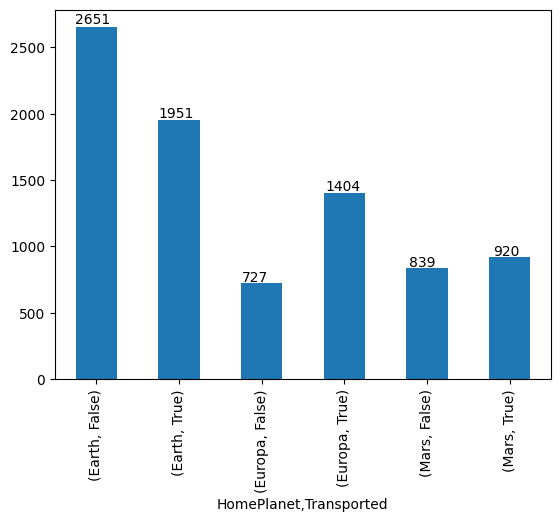

In [12]:
df = train_data.groupby(['HomePlanet','Transported'])
ax = df.count()['PassengerId'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

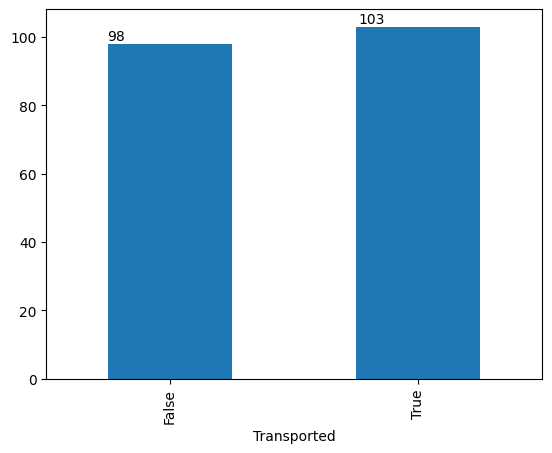

In [13]:
df = train_data[train_data['HomePlanet'].isnull()].groupby(['Transported'])
ax = df.count()['PassengerId'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

In [14]:
train_data['HomePlanet'].fillna('missing', inplace=True)

## CryoSleep

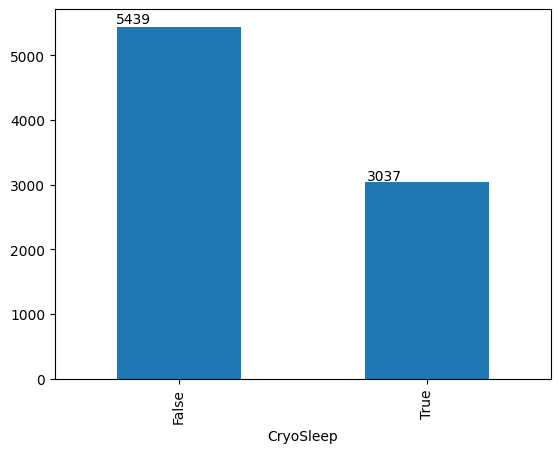

In [15]:
df = train_data.groupby(['CryoSleep'])
ax = df.count()['PassengerId'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

In [16]:
train_data[train_data['CryoSleep'].isna()].shape

(217, 14)

In [17]:
train_data['CryoSleep'].fillna('Missing',inplace=True)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## cabin

In [19]:
def split_cabin(x):
  if len(str(x).split('/'))<3:
    return ['Missing','Missing','Missing']
  else:
    print
    return str(x).split('/')

In [20]:
print(f"count of unique cabins are {train_data['Cabin'].unique().shape[0]} vs count of unique rows {train_data.shape[0]}")
print(train_data['Cabin'].unique())
train_data['temp_cabin']=train_data['Cabin'].apply(lambda x: split_cabin(x))
train_data['Deck']=train_data['temp_cabin'].apply(lambda x: x[0])
train_data['num']=train_data['temp_cabin'].apply(lambda x: x[1])
train_data['side']=train_data['temp_cabin'].apply(lambda x: x[2])
train_data[train_data['Deck'] != 'Missing'].head()

count of unique cabins are 6561 vs count of unique rows 8693
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,temp_cabin,Deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"[B, 0, P]",B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"[F, 0, S]",F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"[A, 0, S]",A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"[A, 0, S]",A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"[F, 1, S]",F,1,S


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  temp_cabin    8693 non-null   object 
 15  Deck          8693 non-null   object 
 16  num           8693 non-null   object 
 17  side          8693 non-null   object 
dtypes: bool(1), float64(6), obje

In [22]:
train_data['num'].unique().shape

(1818,)

<ipython-input-23-9e48f3d9f2e5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = df.sum()['Transported'].plot(kind='bar')


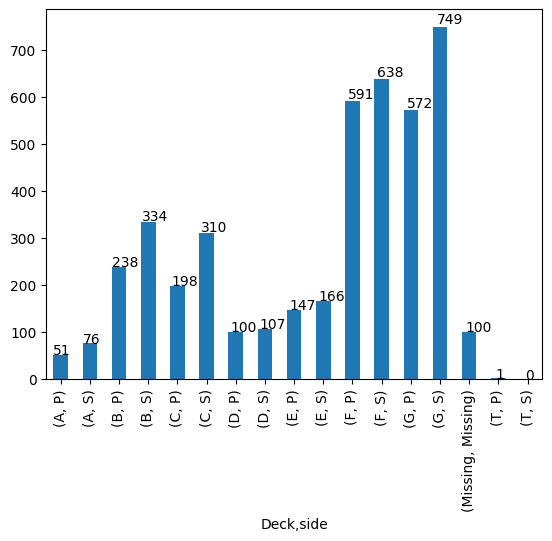

In [23]:
df = train_data.groupby(['Deck','side'])
ax = df.sum()['Transported'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

Thus let's **leave out the num** as there are many unique value but take in the deck and side as input params

## Destination

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  temp_cabin    8693 non-null   object 
 15  Deck          8693 non-null   object 
 16  num           8693 non-null   object 
 17  side          8693 non-null   object 
dtypes: bool(1), float64(6), obje

In [28]:
train_data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

Some Destinations are missing and there are only 3 so let's see if it has any affect in Transported

In [25]:
train_data['Destination'].fillna('missing',inplace=True)

<ipython-input-26-4ea9aba24efe>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = df.sum()['Transported'].plot(kind='bar')


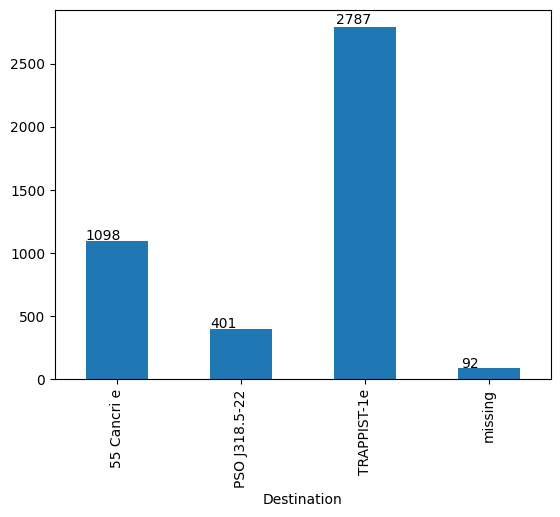

In [26]:
df = train_data.groupby(['Destination'])
ax = df.sum()['Transported'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

## Age

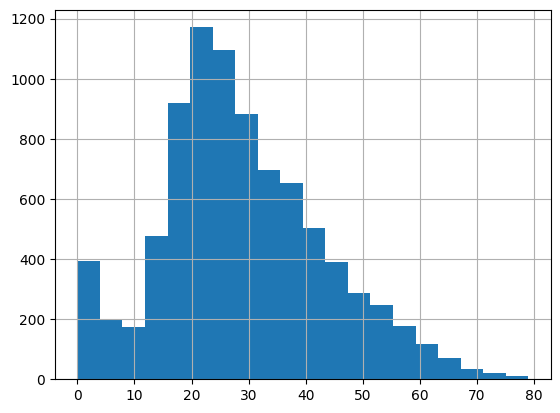

In [29]:
train_data['Age'].hist(bins=20);

In [33]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  temp_cabin    8693 non-null   object 
 15  Deck          8693 non-null   object 
 16  num           8693 non-null   object 
 17  side          8693 non-null   object 
dtypes: bool(1), float64(6), obje

## VIP

In [36]:
train_data['VIP'].fillna('Missing', inplace=True)

## Monetary Spending

In [37]:
train_data['RoomService'].fillna(0, inplace=True)
train_data['FoodCourt'].fillna(0, inplace=True)
train_data['ShoppingMall'].fillna(0, inplace=True)
train_data['Spa'].fillna(0, inplace=True)
train_data['VRDeck'].fillna(0, inplace=True)

# Drop Unnecessary Columns

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  temp_cabin    8693 non-null   object 
 15  Deck          8693 non-null   object 
 16  num           8693 non-null   object 
 17  side          8693 non-null   object 
dtypes: bool(1), float64(6), obje

In [41]:
train_data.drop(['Name','temp_cabin', 'Cabin'], axis=1, inplace=True)

KeyError: ignored

In [43]:
train_data.drop(['num'], axis=1, inplace=True)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  side          8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Modelling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = train_data.drop(['Transported', 'PassengerId'], axis=1)
X = pd.get_dummies(X)
y = train_data['Transported']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [48]:
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1234))
}

In [49]:
GradientBoostingClassifier().get_params()
grid = {
    'rf': {
        'randomforestclassifier__n_estimators':[100,200,300]
    },
    'gb':{
        'gradientboostingclassifier__n_estimators':[100,200,300]
    }
}
pipelines.items()

dict_items([('rf', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=1234))])), ('gb', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=1234))]))])

In [50]:
# Create a blank dictionary to hold the models
fit_models = {}
# Loop through all the algos
for algo, pipeline in pipelines.items():
  print(f'Training the {algo} model.')
  # Create new Grid Search CV Cclass
  model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10)
  # Train the model
  model.fit(X_train, y_train)
  # Store results inside of the dictionary
  fit_models[algo] = model

Training the rf model.
Training the gb model.
